In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

from sympy.vector import CoordSys3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, FixedLocator
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter

# 2D Infinite Parallel Plates

In a simplified model we can describe the field between the two electrodes as the field between two parallel plates:

$\vec{E} = \frac{V}{d}$

Which gives us an infinite, equal field in all directions.

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/368198965.py:9: RuntimeWarning: divide by zero encountered in divide
  V = -V_diff/Y


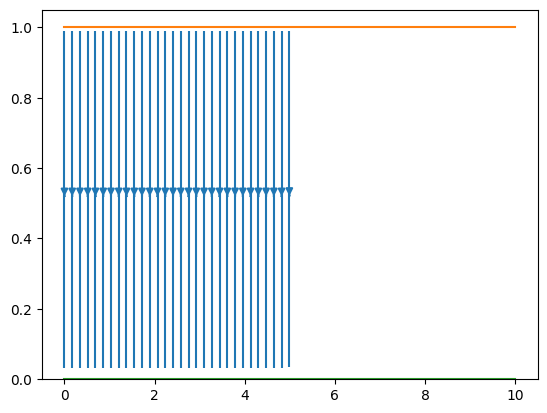

In [3]:
fig, ax1 = plt.subplots()
V_diff = 1 #Volts
x = np.arange(0,11,1)
electrode = np.ones([11,])*V_diff
plate = np.zeros([11,])

Y, X = np.mgrid[0:1:0.01, 0:5:0.01]
U = 0*X
V = -V_diff/Y

ax1.streamplot(X,Y,U,V)
ax1.plot(x, electrode)
ax1.plot(x, plate)

# 2D Infinite Non-Parallel Plates

The above is fine, but we cannot predict the outcome if the plates are not perfectly parallel, which is very likely to happen. Instead we can determine the field between two sides of a wedge. Assume that one edge of an open wedge is at a voltage potential of $V_1$ and angle of $\phi = 0$, and another is at a potential of $V_2$ and an angle of $\phi = \beta$. This will look like:

We cannot have a singularity at (0,0) and we also cannot know the field at infinity, so in order to create a well-behaved problem we can assume that the potential at two different arbitray, non-zero and non-infinity, distances from the origin, differentiated with respect to $rho$ are 0. This gives us a partial differential equation of the form:

With the solution:

$V(\phi) = V_1 + \frac{V_2 - V_1}{\beta}\phi$

We know that the electric field is:

$\vec{E} = -\nabla V$

$\vec{E} = -\frac{V_2 - V_1}{\rho\beta}\hat{a_\phi}$

Which in cartesian is:

$\vec{E} = -\frac{V_2-V_1}{\sqrt{x^2+y^2}\beta}\left(-\sin{\arctan{\frac{y}{x}}}\hat{a_x} + \cos{\arctan{\frac{y}{x}}}\hat{a_y}\right)$

Which looks like:

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/2992599392.py:12: RuntimeWarning: divide by zero encountered in divide
  U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/2992599392.py:12: RuntimeWarning: invalid value encountered in divide
  U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/2992599392.py:13: RuntimeWarning: divide by zero encountered in divide
  V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/2992599392.py:13: RuntimeWarning: invalid value encountered in divide
  V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_60758/2992599392.py:15: RuntimeWarning: divide by zero encountered in divide
  mask = np.arctan(Y2/X2) > beta
/var/fo

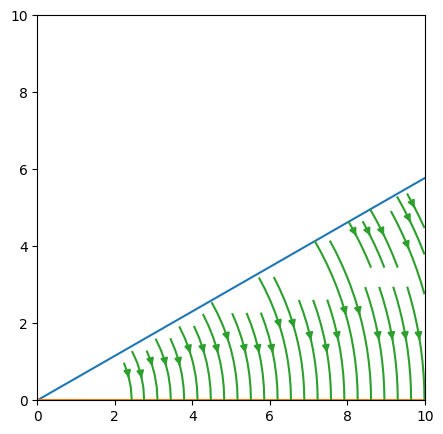

In [5]:
%matplotlib inline

fig, ax2 = plt.subplots(figsize = (5,5))
beta = 30*(np.pi/180)
y_beta = x*np.tan(beta)
y_zero = x*np.tan(0)
ax2.plot(x, y_beta)
ax2.plot(x, y_zero)


Y2, X2 = np.mgrid[0:10:0.01, 0:10:0.01]
U2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(-np.sin(np.arctan(Y2/X2)))
V2 = -V_diff/(np.sqrt(X2**2+Y2**2)*beta)*(np.cos(np.arctan(Y2/X2)))

mask = np.arctan(Y2/X2) > beta
U2[mask] = 0
V2[mask] = 0


ax2.streamplot(X2,Y2,U2,V2)
ax2.set_ylim([0,10])
ax2.set_xlim([0,10])

plt.show()

In [ ]:
del [V_diff, x, electrode, plate, Y, X, U, V, Y2, X2, U2, V2, beta, y_beta, y_zero, mask]


# Paschen Curves Using Parallel and Non-Parallel Models

We can predict the breakdown voltage between two plates using the two above models and the expression:

$\int_{0}^{d}\alpha(E)dr = \ln{\left(1+\frac{1}{\gamma}\right)}$

where $\alpha{E}$ is

$\alpha(E) = Ape^{-Bp/E}$, where $A$ and $B$ are gas constants

The above integral can be converted to polar coordinates to get:

$\int_{\phi_1}^{\phi_2} Ape^{-\frac{Bp\rho\beta}{V_2-V_1}}\rho d\phi = \ln{\left(1+\frac{1}{\gamma}\right)}$

Everything in the integral is independent of phi and as such the problem now is:

$(\phi_2-\phi_1)Ape^{-\frac{Bp\rho\beta}{V_2-V_1}}\rho = \ln{\left(1+\frac{1}{\gamma}\right)}$

Assuming $\phi_1 = 0$, $\phi_2=\beta$, $V_1 = 0$, and $V_{\text{cr}} = V_2$ we get:



$\frac{\beta Ap\rho}{\ln\left(1+\frac{1}{\gamma}\right)} = e^\frac{Bp\rho\beta}{V_{\text{cr}}}$

$\ln{\frac{\beta Ap (d/\sin{\beta})}{\ln{\left(1+\frac{1}{\gamma}\right)}}} = \frac{Bp(d/\sin{\beta})\beta}{V_{\text{cr}}}$

And finally:

$V_{\text{cr}} = \frac{Bp(d/\sin{\beta})\beta}{ln{\frac{\beta Ap (d/\sin{\beta})}{\ln{\left(1+\frac{1}{\gamma}\right)}}}}$

We know that as $\beta$ approaches zero this formula should simplify to the parallel plate model. We can see that this is the case using the small angle theorem which states: 

$\sin\left(\beta\right) \approx \beta$

Using this then each of the terms $\beta/\sin\beta = 1$ and the formula simplifies to the well known:

$V_{\text{cr}} = \frac{Bpd}{\ln\left(\frac{Apd}{\ln\left(1+\frac{1}{\gamma}\right)}\right)}$

For air, we can say A = 15, B = 365, and $\gamma$ = 0.01

<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
<>:50: SyntaxWarning: invalid escape sequence '\p'
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3382039402.py:50: SyntaxWarning: invalid escape sequence '\p'
  custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$']
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3382039402.py:50: SyntaxWarning: invalid escape sequence '\p'
  custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$']
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3382039402.py:17: RuntimeWarning: invalid value encountered in log10
  ax.plot_surface(np.log10(pa), np.log10(pd), np.log10(Vcr_parallel), cmap='coolwarm')
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3382039402.py:50: SyntaxWarning: invalid escape sequence '\p'
  custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$']
/var/folders/36/k342r5bs1qn0khj_k754ypyw0

KeyboardInterrupt: 

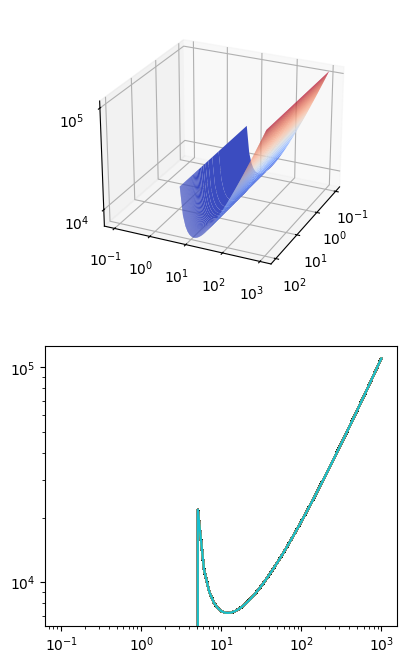

In [ ]:
fig = plt.figure(figsize=(10, 8))

A = 1.04
B = 596.8
gg = 10**-2
beta_angle = 45*(np.pi/180)

pa = np.linspace(10**-1, 10**2, 10**3)
pd = np.linspace(10**-1, 10**3, 10**3)

pa, pd = np.meshgrid(pa, pd)

#parallel plate 3D
Vcr_parallel = (B*pd)/np.log((A*pd)/np.log(1+(1/gg)))

ax = fig.add_subplot(221, projection='3d', )
ax.plot_surface(np.log10(pa), np.log10(pd), np.log10(Vcr_parallel), cmap='coolwarm')

def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
#parallel plate 2D
ax2 = fig.add_subplot(223)
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.plot(pd, Vcr_parallel)
ax.view_init(elev=25, azim=25, roll=0)

#non-parallel plate 3D
beta = np.linspace(0, beta_angle, 10**3)

beta, pd = np.meshgrid(beta, pd)
Vcr_non = (B*pd*beta/np.sin(beta))/np.log((beta*A*pd/np.sin(beta))/np.log(1+(1/gg)))

ax3 = fig.add_subplot(222, projection='3d')
ax3.plot_surface(beta, np.log10(pd), np.log10(Vcr_non), cmap='coolwarm')
ax3.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax3.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax3.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

custom_ticks = [0, np.pi/2, np.pi]
custom_tick_labels = ['$0$', '$\pi/2$', '$\pi$']

ax3.set_xticks(custom_ticks)
ax3.set_xticklabels(custom_tick_labels)
ax3.view_init(elev=25, azim=25, roll=0)

ax4 = fig.add_subplot(224)
#ax4.plot(beta, Vcr_non)

#ax4.set_xticks(custom_ticks)
#ax4.set_xticklabels(custom_tick_labels)

plt.show()

## Minimum Breakdown Voltages per angle offset

In [ ]:
beta_halfint = np.arange(0.5, 90, 0.5)*(np.pi/180)
pd = np.linspace(0,10**2, 100)

parallel = (B*pd)/np.log((A*pd)/np.log(1+(1/gg)))
Vcr_par_pos = parallel[parallel > 0]
par_min = np.min(Vcr_par_pos)

print('%+8r' % 'degrees', '%+8r' % 'V_cr', '%+8r'% 'V Diff', '%+8r' % '% Diff')
print('%8.3f' % 0, '%8.3f' % par_min, '%8.3f' % 0, '%8.3f' % 0)
for beta_ in beta_halfint:
    Vcr_min_func = ((B*pd*beta_/np.sin(beta_))/np.log((beta_*A*pd/np.sin(beta_))/np.log(1+(1/gg))))
    Vcr_min_func = Vcr_min_func[Vcr_min_func > 0]
    Vcr_min = np.min(Vcr_min_func)
    diff = 100*(np.abs(Vcr_min-par_min)/((Vcr_min+par_min)/2))
    if(Vcr_min-par_min > 1):
        print('%8.3f' % (beta_*(180/np.pi)), '%8.3f' % Vcr_min, '%8.3f' % (Vcr_min-par_min), '%8.3f' % diff)



'degrees'   'V_cr' 'V Diff' '% Diff'
   0.000  310.143    0.000    0.000
  20.000  311.194    1.051    0.338
  20.500  311.250    1.107    0.356
  21.000  311.308    1.165    0.375
  21.500  311.367    1.224    0.394
  22.000  311.428    1.285    0.413
  22.500  311.491    1.347    0.434
  23.000  311.555    1.412    0.454
  23.500  311.621    1.478    0.475
  24.000  311.689    1.546    0.497
  24.500  311.759    1.616    0.520
  25.000  311.831    1.687    0.543
  25.500  311.904    1.761    0.566
  26.000  311.979    1.836    0.590
  26.500  312.057    1.913    0.615
  27.000  312.136    1.992    0.640
  27.500  312.217    2.073    0.666
  28.000  312.300    2.156    0.693
  28.500  312.385    2.241    0.720
  29.000  312.472    2.328    0.748
  29.500  312.561    2.418    0.776
  30.000  312.652    2.509    0.806
  30.500  312.746    2.602    0.836
  31.000  312.841    2.698    0.866
  31.500  312.939    2.795    0.897
  32.000  313.039    2.895    0.929
  32.500  313.141    2.997 

/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3321142368.py:4: RuntimeWarning: divide by zero encountered in log
  parallel = (B*pd)/np.log((A*pd)/np.log(1+(1/gg)))
/var/folders/36/k342r5bs1qn0khj_k754ypyw0000gn/T/ipykernel_36885/3321142368.py:11: RuntimeWarning: divide by zero encountered in log
  Vcr_min_func = ((B*pd*beta_/np.sin(beta_))/np.log((beta_*A*pd/np.sin(beta_))/np.log(1+(1/gg))))
